In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dateutil import parser
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
#from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

/home/bahushruth/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_excel('Processed3.xlsx')

# Plotting the number of times the anomaly occurred

In [3]:
df['Target'].value_counts()

0    46232
1     3279
Name: Target, dtype: int64

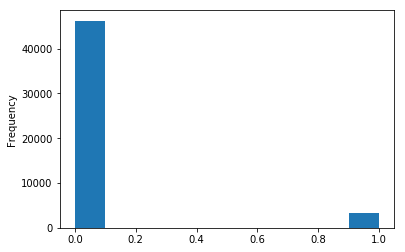

In [4]:
df['Target'].astype(int).plot.hist()

# Plotting the time series graph with anomalies and without anomalies

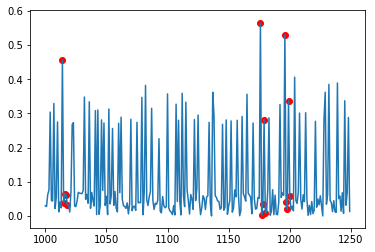

In [5]:
plot_df = df[1000:1250]
df_anomalies = plot_df[plot_df['Target']==1]
plt.plot(plot_df['Acc'])
plt.scatter(df_anomalies.index, df_anomalies.Acc, color='r')

(534.55, 654.45, 0.0, 0.7)

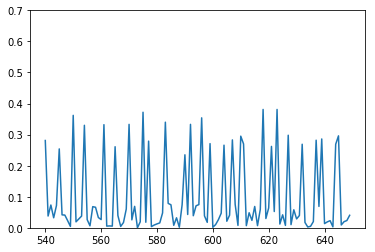

In [6]:
plot_df = df[540:650]
df_anomalies = plot_df[plot_df['Target']==1]
plt.plot(plot_df['Acc'])
plt.scatter(df_anomalies.index, df_anomalies.Acc, color='r')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0.00,0.7))

In [8]:
df

,Acc,Acc_1,Acc_2,Acc_3,Acc_4,Target,diff_1,diff_2,diff_3,diff_4
0,0.030905,0.060341,0.001398,0.050143,0.055039,0,0.029436,0.058943,0.048745,0.004896
1,0.012496,0.030905,0.060341,0.001398,0.050143,0,0.018410,0.029436,0.058943,0.048745
2,0.046744,0.012496,0.030905,0.060341,0.001398,0,0.034248,0.018410,0.029436,0.058943
3,0.003792,0.046744,0.012496,0.030905,0.060341,0,0.042952,0.034248,0.018410,0.029436
4,0.072815,0.003792,0.046744,0.012496,0.030905,0,0.069023,0.042952,0.034248,0.018410
5,0.017993,0.072815,0.003792,0.046744,0.012496,0,0.054821,0.069023,0.042952,0.034248
6,0.026921,0.017993,0.072815,0.003792,0.046744,0,0.008927,0.054821,0.069023,0.042952
7,0.062040,0.026921,0.017993,0.072815,0.003792,0,0.035120,0.008927,0.054821,0.069023
8,0.044539,0.062040,0.026921,0.017993,0.072815,0,0.017502,0.035120,0.008927,0.054821
9,0.003710,0.044539,0.062040,0.026921,0.017993,0,0.040828,0.017502,0.035120,0.008927


In [11]:
def print_report(expected, predicted):
    target_names = ['Anomalies', 'Normal_driving']
    print("Confusion Matrix")
    print(confusion_matrix(expected, predicted)) 
    print(classification_report(expected, predicted, target_names = target_names))

# Using random forest model to perform binary classification on the 5 acc values

In [12]:
columns = ['Acc', 'Acc_1','Acc_2','Acc_3','Acc_4']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(df[columns], df.Target, test_size=0.3)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
xs = clf.predict(X_test)
print_report(y_test, xs)

Confusion Matrix
[[13792    31]
 [   47   984]]
                precision    recall  f1-score   support

     Anomalies       1.00      1.00      1.00     13823
Normal_driving       0.97      0.95      0.96      1031

   avg / total       0.99      0.99      0.99     14854



# Accuracy of 0.99 was achieved. The model must have overfit on this dataset. Although this is a proof of concept and not an actual production model. Production model uses the data collected by our onboard device on the car.

In [34]:
def detectAnomaly(curVel,vel1,vel2,vel3,vel4):
    result = clf.predict(np.array([curVel,vel1,vel2,vel3,vel4]).reshape(1, -1))
    return result[0]

In [36]:
print(detectAnomaly(0.043198, 0.343000, 0.061456, 0.079447, 0.052309))

0


In [37]:
print(detectAnomaly(0.043198, 0.343000, 0.061456, 0.79447, 0.052309))

1


# Try out the model by providing different values yourself